<a href="https://colab.research.google.com/github/kuds/rl-lunar-lander/blob/main/%5BLunar%20Lander%5D%20Proximal%20Policy%20Optimization%20(PPO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proximal Policy Optimization (PPO)
---
In this notebook, you will implement a PPO agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
!pip install swig

In [2]:
!pip install stable_baselines3 gymnasium gymnasium[box2d]

  Using cached stable_baselines3-2.3.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu1

In [3]:
import gymnasium
import stable_baselines3
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage
from stable_baselines3.common.vec_env import VecVideoRecorder

import torch
import numpy
import scipy
import platform
import IPython
import matplotlib
import matplotlib.pyplot

In [4]:
print("Python Version: {}".format(platform.python_version()))
print("Is Cuda Available: {}".format(torch.cuda.is_available()))
print("Torch Version: {}".format(torch.__version__))
print("Cuda Version: {}".format(torch.version.cuda))
print("Scipy Version: {}".format(scipy.__version__))
print("Numpy Version: {}".format(numpy.__version__))
print("Stable Baseline Version: {}".format(stable_baselines3.__version__))
print("IPython Version: {}".format(IPython.__version__))
print("Gymnasium Version: {}".format(gymnasium.__version__))

Python Version: 3.10.12
Is Cuda Available: True
Torch Version: 2.3.1+cu121
Cuda Version: 12.1
Scipy Version: 1.13.1
Numpy Version: 1.26.4
Stable Baseline Version: 2.3.2
IPython Version: 7.34.0
Gymnasium Version: 0.29.1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#env = gymnasium.make("LunarLander-v2", continuous=True)
env = make_vec_env("LunarLanderContinuous-v2", n_envs=1)

#env_val = gymnasium.make("LunarLander-v2", render_mode="rgb_array", continuous=True)
env_val = make_vec_env("LunarLanderContinuous-v2", n_envs=1)

eval_callback = EvalCallback(env_val, best_model_save_path="./logs/", log_path="./logs/", eval_freq=1000, render=False)

# Initialize PPO
model = PPO('MlpPolicy', env, verbose=0)

# Train the model
model.learn(total_timesteps=50000,  progress_bar=True, callback=eval_callback)

# Save the model
model.save("ppo_lunar_lander_continous")

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

env.close()
env_val.close()

Output()

Eval num_timesteps=1000, episode_reward=-154.32 +/- 35.46

Episode length: 85.00 +/- 4.34

New best mean reward!

Eval num_timesteps=2000, episode_reward=-135.44 +/- 57.95

Episode length: 86.60 +/- 32.40

New best mean reward!

Eval num_timesteps=3000, episode_reward=-215.72 +/- 117.17

Episode length: 147.80 +/- 31.33

Eval num_timesteps=4000, episode_reward=-114.77 +/- 72.25

Episode length: 120.00 +/- 43.48

New best mean reward!

Eval num_timesteps=5000, episode_reward=-79.53 +/- 62.53

Episode length: 79.20 +/- 15.04

New best mean reward!

Eval num_timesteps=6000, episode_reward=-92.64 +/- 40.81

Episode length: 78.80 +/- 9.20

Eval num_timesteps=7000, episode_reward=-90.31 +/- 91.06

Episode length: 79.00 +/- 11.98

Eval num_timesteps=8000, episode_reward=-107.98 +/- 79.56

Episode length: 86.40 +/- 9.83

Eval num_timesteps=9000, episode_reward=-136.68 +/- 54.81

Episode length: 137.40 +/- 28.12

Eval num_timesteps=10000, episode_reward=-152.07 +/- 50.58

Episode length: 150.80 +/- 29.08

Eval num_timesteps=11000, episode_reward=-163.52 +/- 32.97

Episode length: 207.00 +/- 146.98

Eval num_timesteps=12000, episode_reward=-141.06 +/- 48.90

Episode length: 132.60 +/- 9.79

Eval num_timesteps=13000, episode_reward=-251.16 +/- 95.27

Episode length: 251.00 +/- 89.10

Eval num_timesteps=14000, episode_reward=-123.37 +/- 22.03

Episode length: 202.80 +/- 91.53

Eval num_timesteps=15000, episode_reward=-133.47 +/- 35.36

Episode length: 177.40 +/- 61.17

Eval num_timesteps=16000, episode_reward=-187.90 +/- 82.61

Episode length: 264.80 +/- 139.10

Eval num_timesteps=17000, episode_reward=-90.32 +/- 137.58

Episode length: 311.00 +/- 121.74

Eval num_timesteps=18000, episode_reward=-53.08 +/- 114.99

Episode length: 342.80 +/- 203.18

New best mean reward!

Eval num_timesteps=19000, episode_reward=-211.82 +/- 205.20

Episode length: 274.20 +/- 54.03

Eval num_timesteps=20000, episode_reward=-39.04 +/- 131.44

Episode length: 286.80 +/- 107.37

New best mean reward!

Eval num_timesteps=21000, episode_reward=-102.76 +/- 195.83

Episode length: 385.20 +/- 159.57

Eval num_timesteps=22000, episode_reward=-181.48 +/- 117.44

Episode length: 361.40 +/- 159.41

Eval num_timesteps=23000, episode_reward=-171.61 +/- 53.50

Episode length: 270.40 +/- 132.12

Eval num_timesteps=24000, episode_reward=9.51 +/- 167.69

Episode length: 336.60 +/- 98.11

New best mean reward!

Eval num_timesteps=25000, episode_reward=-188.26 +/- 66.02

Episode length: 485.00 +/- 272.47

Eval num_timesteps=26000, episode_reward=-179.01 +/- 58.33

Episode length: 266.80 +/- 118.77

Eval num_timesteps=27000, episode_reward=-80.59 +/- 54.02

Episode length: 509.00 +/- 402.23

Eval num_timesteps=28000, episode_reward=-49.55 +/- 161.10

Episode length: 299.40 +/- 151.23

Eval num_timesteps=29000, episode_reward=-68.63 +/- 105.02

Episode length: 255.00 +/- 94.71

Eval num_timesteps=30000, episode_reward=-102.94 +/- 14.36

Episode length: 384.40 +/- 336.97

Eval num_timesteps=31000, episode_reward=-130.37 +/- 58.26

Episode length: 222.00 +/- 74.34

Eval num_timesteps=32000, episode_reward=-107.00 +/- 49.31

Episode length: 164.00 +/- 26.74

Eval num_timesteps=33000, episode_reward=-136.18 +/- 31.06

Episode length: 161.40 +/- 34.45

Eval num_timesteps=34000, episode_reward=-163.68 +/- 58.19

Episode length: 292.40 +/- 227.03

Eval num_timesteps=35000, episode_reward=52.65 +/- 168.90

Episode length: 661.00 +/- 288.96

New best mean reward!

Eval num_timesteps=36000, episode_reward=-173.38 +/- 52.02

Episode length: 793.40 +/- 242.12

Eval num_timesteps=37000, episode_reward=133.99 +/- 162.15

Episode length: 322.60 +/- 96.39

New best mean reward!

Eval num_timesteps=38000, episode_reward=-30.23 +/- 136.88

Episode length: 277.00 +/- 87.75

Eval num_timesteps=39000, episode_reward=-10.64 +/- 166.57

Episode length: 304.80 +/- 156.86

Eval num_timesteps=40000, episode_reward=108.19 +/- 162.49

Episode length: 449.40 +/- 55.33

Eval num_timesteps=41000, episode_reward=76.96 +/- 179.19

Episode length: 431.00 +/- 129.93

Eval num_timesteps=42000, episode_reward=61.37 +/- 124.81

Episode length: 445.20 +/- 140.45

Eval num_timesteps=43000, episode_reward=-87.02 +/- 164.64

Episode length: 488.60 +/- 195.49

Eval num_timesteps=44000, episode_reward=5.35 +/- 164.34

Episode length: 383.60 +/- 125.64

Eval num_timesteps=45000, episode_reward=93.72 +/- 192.26

Episode length: 323.80 +/- 115.48

Eval num_timesteps=46000, episode_reward=77.82 +/- 137.82

Episode length: 361.80 +/- 96.31

Eval num_timesteps=47000, episode_reward=78.69 +/- 144.55

Episode length: 461.60 +/- 55.95

Eval num_timesteps=48000, episode_reward=-43.16 +/- 99.28

Episode length: 458.60 +/- 71.82

Eval num_timesteps=49000, episode_reward=101.69 +/- 122.39

Episode length: 537.80 +/- 80.34

Eval num_timesteps=50000, episode_reward=-51.74 +/- 99.59

Episode length: 871.60 +/- 203.76

Eval num_timesteps=51000, episode_reward=-50.06 +/- 125.34

Episode length: 826.40 +/- 303.75

Mean reward: -90.38 +/- 64.61


In [6]:
# #env = gymnasium.make("LunarLander-v2", continuous=True)
# env = make_vec_env("LunarLander-v2", n_envs=1)

# #env_val = gymnasium.make("LunarLander-v2", render_mode="rgb_array", continuous=True)
# env_val = make_vec_env("LunarLander-v2", n_envs=1)

# eval_callback = EvalCallback(env_val, best_model_save_path="./logs/", log_path="./logs/", eval_freq=500, render=False,  deterministic=True)

# # Initialize PPO
# model = PPO('MlpPolicy', env, verbose=0)

# # Train the model
# model.learn(total_timesteps=20000,  progress_bar=True, callback=eval_callback)

# # Save the model
# model.save("pp_lunar_lander")

# mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5)
# print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# env.close()
# env_val.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Load the best model
env = make_vec_env("LunarLanderContinuous-v2", n_envs=1, seed=0)
best_model_path = "./logs/best_model.zip"
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=15)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Record video of the best model playing CarRacing
env = VecVideoRecorder(env, "./videos/", video_length=5000, record_video_trigger=lambda x: x == 0, name_prefix="best_model_lunar_lander_ppo")

obs = env.reset()
for _ in range(5000):
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones:
      break

env.close()

Best Model - Mean reward: -42.70 +/- 139.80
Moviepy - Building video /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


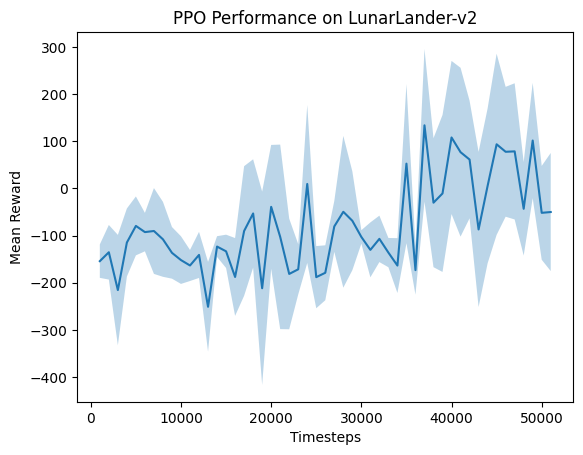

In [8]:
# Load the evaluations.npz file
data = numpy.load('./logs/evaluations.npz')

# Extract the relevant data
timesteps = data['timesteps']
results = data['results']

# Calculate the mean and standard deviation of the results
mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

# Plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps, mean_results - std_results, mean_results + std_results, alpha=0.3)
matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title('PPO Performance on LunarLander-v2')
matplotlib.pyplot.show()